In [422]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

1. Copy/paste Datas into INPUT.csv
2. Read Csv


Path zu CSV definiren


In [423]:
csv_file = "INPUT.csv"

CSV Datei lesen und zu "single_val_list" List hinzufügen


In [424]:
with open(csv_file, "r") as file:
    csv_reader = csv.reader(file, delimiter=";")
    single_val_list = [
        float(item.replace(",", ".")) for sublist in csv_reader for item in sublist
    ]

Die List "single_val_list" in ein numpy array umwandeln


In [425]:
single_val_list_array = np.array(single_val_list)

val_array anzeigen


In [426]:
print("Result from first loop", single_val_list_array)
print("Anzahl Elemente=", len(single_val_list_array))

Result from first loop [47.5 48.  48.5 49.5 50.  50.  50.5 50.5 51.  51.  51.  51.5 51.5 52.
 52.  52.  52.  52.  52.5 52.5 52.5 53.  53.  53.  53.  53.  53.5 53.5
 53.5 53.5 54.  54.  54.  54.  54.  54.5 54.5 54.5 54.5 55.  55.  55.
 55.  55.  55.  55.  55.5 55.5 55.5 55.5 55.5 55.5 55.5 55.5 55.5 55.5
 55.5 55.5 55.5 56.  56.  56.  56.  56.  56.  56.  56.  56.  56.  56.5
 56.5 56.5 56.5 56.5 56.5 56.5 56.5 56.5 56.5 56.5 57.  57.  57.  57.
 57.  57.  57.  57.  57.  57.  57.  57.  57.  57.5 57.5 57.5 57.5 57.5
 57.5 57.5 58.  58.  58.  58.  58.  58.  58.  58.  58.  58.5 58.5 58.5
 58.5 58.5 58.5 58.5 58.5 58.5 58.5 58.5 59.  59.  59.  59.  59.  59.
 59.  59.  59.  59.  59.  59.  59.  59.  59.  59.5 59.5 59.5 59.5 59.5
 59.5 59.5 60.  60.  60.  60.  60.  60.  60.  60.  60.5 60.5 60.5 60.5
 60.5 60.5 60.5 61.  61.  61.  61.  61.  61.  61.  61.  61.  61.  61.
 61.5 61.5 61.5 61.5 61.5 62.  62.  62.  62.  62.5 62.5 62.5 62.5 62.5
 63.  63.  63.  63.  63.  63.5 63.5 63.5 63.5 64.  64.  64.

# Die Spannweite ist der unterschied zwischen Max und Min in der Werte liste


In [427]:
min_wert = float(min(single_val_list_array))
max_wert = float(max(single_val_list_array))
spannweite = max_wert - min_wert
print("MIN Wert=", min_wert)
print("MAX Wert=", max_wert)
print("Spannweite=", spannweite)

MIN Wert= 47.5
MAX Wert= 67.0
Spannweite= 19.5


# Median


In [428]:
median = np.median(single_val_list_array)
print(" Der Median  ist=", median)

 Der Median  ist= 57.75


# Quartil


In [429]:
q1 = np.percentile(single_val_list_array, 25)
# q2 wäre der median
q3 = np.percentile(single_val_list_array, 75)

q_weite = q3 - q1

print("quartil_unten =", q1)
print("quartil_oben =", q3)
print("quartil_weite=", q_weite)

quartil_unten = 55.5
quartil_oben = 60.125
quartil_weite= 4.625


# AusreisserGrenzen


In [430]:
aus_unten = q1 - 1.5 * q_weite
aus_oben = q3 + 1.5 * q_weite

print("AusreisserGrenze_unten =", aus_unten)
print("AusreisserGrenze =", aus_oben)

AusreisserGrenze_unten = 48.5625
AusreisserGrenze = 67.0625


# Häufigkeitstabelle


In [459]:
def haufigkeitstabelle(values):
  unique_val, counts = np.unique(values, return_counts=True)
  unique_val_count = len(unique_val)
  unique_val_sum = sum(unique_val)
  occur_dict = dict(zip(unique_val, counts))
  print(occur_dict)
  print("unique_count=", f"{unique_val_count}")
  print("unique_val_sum=", f"{unique_val_sum}")

haufigkeitstabelle(single_val_list_array)

{47.5: 1, 48.0: 1, 48.5: 1, 49.5: 1, 50.0: 2, 50.5: 2, 51.0: 3, 51.5: 2, 52.0: 5, 52.5: 3, 53.0: 5, 53.5: 4, 54.0: 5, 54.5: 4, 55.0: 7, 55.5: 13, 56.0: 10, 56.5: 11, 57.0: 13, 57.5: 7, 58.0: 9, 58.5: 11, 59.0: 15, 59.5: 7, 60.0: 8, 60.5: 7, 61.0: 11, 61.5: 5, 62.0: 4, 62.5: 5, 63.0: 5, 63.5: 4, 64.0: 3, 65.0: 3, 65.5: 1, 67.0: 2}
unique_count= 36
unique_val_sum= 2044.0


Graphisch Haufigkeitstabelle anzeigen


In [432]:
df = pd.DataFrame(list(occur_dict.items()), columns=["Wert", "Haufigkeit"])
print(df)

    Wert  Haufigkeit
0   47.5           1
1   48.0           1
2   48.5           1
3   49.5           1
4   50.0           2
5   50.5           2
6   51.0           3
7   51.5           2
8   52.0           5
9   52.5           3
10  53.0           5
11  53.5           4
12  54.0           5
13  54.5           4
14  55.0           7
15  55.5          13
16  56.0          10
17  56.5          11
18  57.0          13
19  57.5           7
20  58.0           9
21  58.5          11
22  59.0          15
23  59.5           7
24  60.0           8
25  60.5           7
26  61.0          11
27  61.5           5
28  62.0           4
29  62.5           5
30  63.0           5
31  63.5           4
32  64.0           3
33  65.0           3
34  65.5           1
35  67.0           2


HISTOGRAMM dafür braucht es ein Array, haben wir als single_val_list_array )


In [433]:
np.histogram(single_val_list_array, bins=10)

(array([ 3,  8, 15, 20, 47, 42, 33, 19, 10,  3]),
 array([47.5 , 49.45, 51.4 , 53.35, 55.3 , 57.25, 59.2 , 61.15, 63.1 ,
        65.05, 67.  ]))

Histogramm als Graphique Darstellung


Text(0.5, 1.0, 'Histogramm mit 10 Klassen')

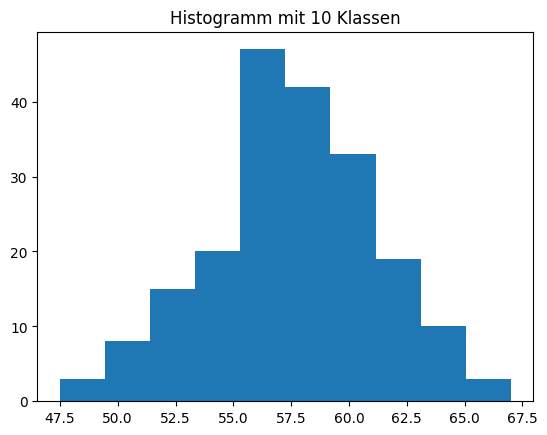

In [434]:
plt.hist(single_val_list_array, bins=10)
plt.title("Histogramm mit 10 Klassen")

Klasseneinteilung = unique_val//2


In [437]:
def round_num_with_multiple(num, multiple):
    entier_part = num // multiple
    deci_part = num % multiple

    if deci_part >= multiple / 2:
        return (entier_part + 1) * multiple
    else:
        return entier_part * multiple


def round_down(num, multiple):
    rounded_num = round_num_with_multiple(num, multiple)
    if rounded_num > num:
        return rounded_num - multiple
    else:
        return rounded_num


def round_up(num, multiple):
    rounded_num = round_num_with_multiple(num, multiple)
    if rounded_num < num:
        return rounded_num + multiple
    else:
        return rounded_num


klasseneinteilung = np.sqrt(unique_val_count)
# klassen_multiple = round(Klasseneinteilung,-1)
klassen_multiple = 5
klassen_spannweite = round_num_with_multiple(klasseneinteilung, klassen_multiple)
klassen_min = round_down(min_wert, klassen_multiple)
klassen_max = round_up(max_wert, klassen_multiple)
klassen_anzahl_brutto = (klassen_max - klassen_min) / klassen_spannweite
klassen_anzahl = round_up(klassen_anzahl_brutto, 1)
print("klasseneinteilung=", f"{klasseneinteilung}")
print("klassen_multiple=", f"{klassen_multiple}")
print("klassen_spannweite=", f"{klassen_spannweite}")
print("klassen_min=", f"{klassen_min}")
print("klassen_max=", f"{klassen_max}")
print("klassen_anzahl_brutto=", f"{klassen_anzahl_brutto}")
print("klassen_anzahl=", f"{klassen_anzahl}")

klasseneinteilung= 6.0
klassen_multiple= 5
klassen_spannweite= 5.0
klassen_min= 45.0
klassen_max= 70.0
klassen_anzahl_brutto= 5.0
klassen_anzahl= 5.0


Create Klass


In [438]:
def get_haeufigkeit(klass_from_val, klass_to_val):
    sum_occur = 0
    for occurence in occur_dict:
        if klass_from_val <= occurence and klass_to_val > occurence:
            sum_occur = sum_occur + occur_dict[occurence]
        else:
            continue
    return sum_occur


# print(get_haeufigkeit(45.0,50.0))


def get_relative_haeufigkeit(occurence):
    return occurence / len(single_val_list_array)


def get_perc_occurence(relativ_occ):
    return relativ_occ * 100


klassen_dict = {}
klass_id = 1
klass_from_val = klassen_min
cum_occurence = 0
cum_relativ_occ = 0
cum_perc_occurence = 0
while klass_id <= klassen_anzahl:
    klass_to_val = klass_from_val + klassen_multiple
    occurence = get_haeufigkeit(klass_from_val, klass_to_val)
    cum_occurence = cum_occurence + occurence
    relativ_occ = get_relative_haeufigkeit(occurence)
    cum_relativ_occ = cum_relativ_occ + relativ_occ
    perc_occurence = get_perc_occurence(relativ_occ)
    cum_perc_occurence = cum_perc_occurence + get_perc_occurence(relativ_occ)
    klassen_dict[f"klass_id : {klass_id}"] = {
        "from_val": klass_from_val,
        "to_val": klass_to_val,
        "occurence": occurence,
        "cum_occurence": cum_occurence,
        "relativ_occurence": relativ_occ,
        "cum_relativ_occurence": cum_relativ_occ,
        "perc_occurence": perc_occurence,
        "cum_perc_occurence": cum_perc_occurence,
    }
    klass_from_val = klass_to_val
    klass_id = klass_id + 1

df2 = pd.DataFrame(klassen_dict).transpose()
print(df2)

# print(klassen_dict)

# for k in klassen_dict:
#   print(klassen_dict[k])

              from_val  to_val  occurence  cum_occurence  relativ_occurence  \
klass_id : 1      45.0    50.0        4.0            4.0              0.020   
klass_id : 2      50.0    55.0       35.0           39.0              0.175   
klass_id : 3      55.0    60.0      103.0          142.0              0.515   
klass_id : 4      60.0    65.0       52.0          194.0              0.260   
klass_id : 5      65.0    70.0        6.0          200.0              0.030   

              cum_relativ_occurence  perc_occurence  cum_perc_occurence  
klass_id : 1                  0.020             2.0                 2.0  
klass_id : 2                  0.195            17.5                19.5  
klass_id : 3                  0.710            51.5                71.0  
klass_id : 4                  0.970            26.0                97.0  
klass_id : 5                  1.000             3.0               100.0  


Nun erstellen wir einen Box- und Whiskersplot.


Text(0.5, 1.0, 'Box- und Whiskersplot')

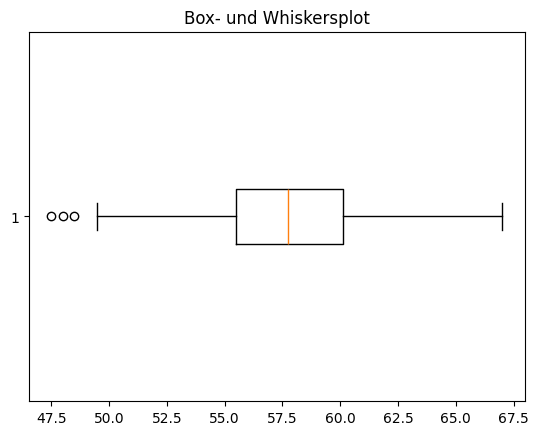

In [439]:
plt.boxplot(single_val_list, vert=False)
plt.title("Box- und Whiskersplot")

Nun erstellen wir einen Box- und Whiskersplot mit einer Kerbe.


Text(0.5, 1.0, 'Box- und Whiskersplot mit einer Kerbe')

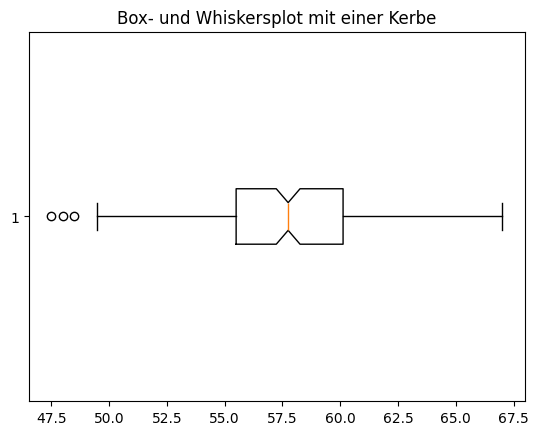

In [440]:
plt.boxplot(single_val_list, vert=False, notch=True)
plt.title("Box- und Whiskersplot mit einer Kerbe")

# Q-Q Plote


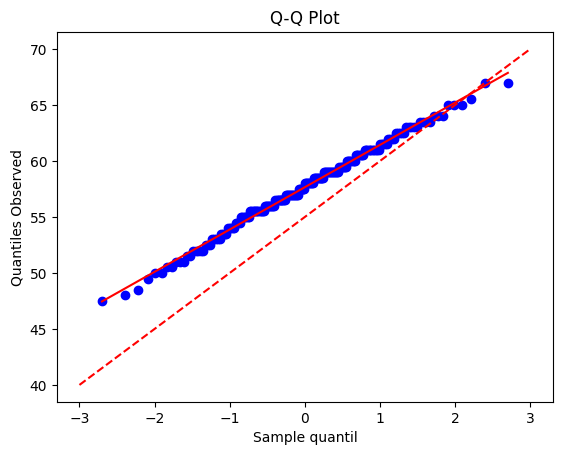

In [441]:
# erstellen des Q-Q Plot mit mein bereits existierender array
stats.probplot(single_val_list_array, dist="norm", plot=plt)

# Reference Line (y = x)
plt.plot([-3, 3], [40, 70], color="red", linestyle="--")

# Title
plt.title("Q-Q Plot")
plt.xlabel("Sample quantil")
plt.ylabel("Quantiles Observed")

# show graphic
plt.show()